In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time
import seaborn as sns


from sklearn.pipeline import Pipeline


from sklearn.model_selection import train_test_split 

# Pre-procesamiento
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Clasifación
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv  
from sklearn.model_selection import HalvingGridSearchCV
import torch
from torch import nn
import torchvision
#librerias necesarias para Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Softmax


from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam, SGD


# Metricas de evaluación
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score

c:\Users\Matias\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Matias\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\detection\anchor_utils.py:63: UserWarning: Failed to initialize NumPy: module compiled against API version 0x10 but this version of numpy is 0xf (Triggered internally at ..\torch\csrc\utils\tensor_numpy.cpp:77.)
  device: torch.device = torch.device("cpu"),


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

#Partimos importando los datos del mes de Julio

In [3]:
path1 = 'Datos de Asignacion/ASIGNACION_202207.xlsx'
asig_07 = pd.read_excel(path1)

In [4]:
asig_07 = asig_07[['RUT', 'PERIODO', 'FECHA_CASTIGO', 'MONTO_CASTIGO_ORIGINAL', 'SALDO_GENERADO', 'SALDO_CONTABLE', 'COMUNA',
                   'REGION','NRO_REGION', 'REGION_SUCURSAL', 'SUCURSAL', 'MARCA_PAGO',	'MARCA_EMPEX', 'CONTACTO_TELEFONICO',
                   'CONTACTO_TERRENO', 'COB_JUDICIAL', 'CONVENIO', 'CONVENIO_ACTIVO', 'CASTIGO_TRIB',
                   'COMISION_MORA',	'INTERES_MORA', 'IMPUESTO_MORA', 'CAPITAL_NO_FINANCIADO']]

In [5]:
asig_07.PERIODO = asig_07.PERIODO.astype(str) + '01'
asig_07 = asig_07.dropna()
asig_07.PERIODO = pd.to_datetime(asig_07.PERIODO, format='%Y%m%d')
asig_07.DIAS_CASTIGO = asig_07.PERIODO - asig_07.FECHA_CASTIGO
asig_07.head(6)

C:\Users\Matias\AppData\Local\Temp\ipykernel_15144\3709964011.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  asig_07.DIAS_CASTIGO = asig_07.PERIODO - asig_07.FECHA_CASTIGO


,RUT,PERIODO,FECHA_CASTIGO,MONTO_CASTIGO_ORIGINAL,SALDO_GENERADO,SALDO_CONTABLE,COMUNA,REGION,NRO_REGION,REGION_SUCURSAL,...,CONTACTO_TELEFONICO,CONTACTO_TERRENO,COB_JUDICIAL,CONVENIO,CONVENIO_ACTIVO,CASTIGO_TRIB,COMISION_MORA,INTERES_MORA,IMPUESTO_MORA,CAPITAL_NO_FINANCIADO
0,16057720,2022-07-01,2018-01-31,252172,252172,252172,ÑUÑOA,REGION METROPOLITANA DE SANTIAGO,RM,SANTIAGO,...,NO,NO,NO,NO,NO,NO,0,19396,0,232776
2,17070814,2022-07-01,2009-08-05,339621,339621,339621,QUINTERO,V REGION DE VALPARAISO,V REGION,VALPARAISO,...,NO,NO,NO,NO,NO,NO,0,0,0,0
4,17074518,2022-07-01,2018-07-31,316718,316718,316718,COLINA,REGION METROPOLITANA DE SANTIAGO,RM,SANTIAGO,...,NO,NO,NO,NO,NO,NO,6257,32377,0,278084
5,17074609,2022-07-01,2019-10-07,1569333,1569333,1569333,LAMPA,REGION METROPOLITANA DE SANTIAGO,RM,SANTIAGO,...,NO,NO,NO,NO,NO,NO,0,36177,0,1532723
6,17075119,2022-07-01,2018-05-31,262639,262639,262639,PADRE LAS CASAS,IX REGION DE LA ARAUCANIA,IX REGION,TEMUCO,...,NO,NO,NO,NO,NO,NO,0,22419,0,240220
7,17075315,2022-07-01,2018-10-31,1431970,1431970,1431970,FREIRE,IX REGION DE LA ARAUCANIA,IX REGION,SIN SUCURSAL,...,NO,NO,NO,NO,NO,NO,0,26077,0,1405893


In [6]:
path2 = 'Datos de Pago/Pagos_202207.xlsx'
pagos_07 = pd.read_excel(path2)
pagos_07.head()

,PERIODO,CEDENTE,CARTERA,RUT,NRO_OPERACION,FECHA_CASTIGO,SALDO_GENERADO,COMUNA,SUCURSAL,COB_JUDICIAL,...,PROB_PAGO_MIS,TRAMO_ANTIGUEDAD_LICITACION,AUX,Q_PAGO,MEJOR_GESTION_CD,MEJOR_GESTION_CI,MEJOR_GESTION_SC,MEJOR_GESTION_SG,N_GESTION,Q_CONTACTOS
0,202207,CAR,CASTIGO,4264719,NaN,2019-05-06,532772,CURICO,CURICO,NO,...,ALTO,B: 19-48,1,1,0,0,1,0,9,0
1,202207,CAR,CASTIGO,4069118,NaN,2019-03-31,673310,LA CISTERNA,SANTIAGO,NO,...,ALTO,B: 19-48,1,1,0,0,1,0,23,0
2,202207,CAR,CASTIGO,5386558,NaN,2019-10-07,835817,CORONEL,CONCEPCION,NO,...,ALTO,B: 13-36,1,1,1,0,0,0,8,1
3,202207,CAR,CASTIGO,5326791,NaN,2022-02-15,823005,CASABLANCA,VALPARAISO,NO,...,ALTO,A: 0-12,1,1,1,0,0,0,18,1
4,202207,CAR,CASTIGO,5492008,NaN,2017-06-30,716536,PUERTO MONTT,PUERTO MONTT,NO,...,MEDIO,D: 61++,1,1,1,0,0,0,10,1


In [7]:
asig_07.RUT = asig_07.RUT.astype(int)
pagos_07.RUT = pagos_07.RUT.astype(int)

In [8]:
pagadores = []
#Si la persona pagó se le asigna un 1 y si no pago un 0 
pagos = list(pagos_07['RUT'])
for rut in asig_07.RUT:
     if rut in pagos:
       pagadores.append(1)
     else:
       pagadores.append(0)



In [9]:
df1 = asig_07.copy()
df1['pagadores'] = pagadores
df1.head(10)

,RUT,PERIODO,FECHA_CASTIGO,MONTO_CASTIGO_ORIGINAL,SALDO_GENERADO,SALDO_CONTABLE,COMUNA,REGION,NRO_REGION,REGION_SUCURSAL,...,CONTACTO_TERRENO,COB_JUDICIAL,CONVENIO,CONVENIO_ACTIVO,CASTIGO_TRIB,COMISION_MORA,INTERES_MORA,IMPUESTO_MORA,CAPITAL_NO_FINANCIADO,pagadores
0,16057720,2022-07-01,2018-01-31,252172,252172,252172,ÑUÑOA,REGION METROPOLITANA DE SANTIAGO,RM,SANTIAGO,...,NO,NO,NO,NO,NO,0,19396,0,232776,0
2,17070814,2022-07-01,2009-08-05,339621,339621,339621,QUINTERO,V REGION DE VALPARAISO,V REGION,VALPARAISO,...,NO,NO,NO,NO,NO,0,0,0,0,0
4,17074518,2022-07-01,2018-07-31,316718,316718,316718,COLINA,REGION METROPOLITANA DE SANTIAGO,RM,SANTIAGO,...,NO,NO,NO,NO,NO,6257,32377,0,278084,0
5,17074609,2022-07-01,2019-10-07,1569333,1569333,1569333,LAMPA,REGION METROPOLITANA DE SANTIAGO,RM,SANTIAGO,...,NO,NO,NO,NO,NO,0,36177,0,1532723,0
6,17075119,2022-07-01,2018-05-31,262639,262639,262639,PADRE LAS CASAS,IX REGION DE LA ARAUCANIA,IX REGION,TEMUCO,...,NO,NO,NO,NO,NO,0,22419,0,240220,0
7,17075315,2022-07-01,2018-10-31,1431970,1431970,1431970,FREIRE,IX REGION DE LA ARAUCANIA,IX REGION,SIN SUCURSAL,...,NO,NO,NO,NO,NO,0,26077,0,1405893,0
8,17071517,2022-07-01,2017-10-31,297750,297750,297750,RECOLETA,REGION METROPOLITANA DE SANTIAGO,RM,SANTIAGO,...,NO,NO,NO,NO,NO,0,14346,0,283404,0
9,17072008,2022-07-01,2018-10-31,1886795,1886795,1886795,HUECHURABA,REGION METROPOLITANA DE SANTIAGO,RM,SANTIAGO,...,NO,NO,NO,NO,NO,0,107123,0,1779672,0
10,17072012,2022-07-01,2019-05-06,425474,425474,425474,RECOLETA,REGION METROPOLITANA DE SANTIAGO,RM,SANTIAGO,...,NO,NO,NO,NO,NO,0,47950,0,377524,0
11,17072112,2022-07-01,2019-02-28,1482099,1322099,1322099,TILTIL,REGION METROPOLITANA DE SANTIAGO,RM,SANTIAGO,...,NO,NO,NO,NO,NO,0,32495,0,1449604,0


#Ahora importamos los datos del mes de Agosto

In [10]:
path1 = 'Datos de Asignacion/ASIGNACION_202208.xlsx'
asig_08 = pd.read_excel(path1)

In [11]:
asig_08 = asig_08[['RUT', 'PERIODO', 'FECHA_CASTIGO', 'MONTO_CASTIGO_ORIGINAL', 'SALDO_GENERADO', 'SALDO_CONTABLE', 'COMUNA',
                   'REGION','NRO_REGION', 'REGION_SUCURSAL', 'SUCURSAL', 'MARCA_PAGO',	'MARCA_EMPEX', 'CONTACTO_TELEFONICO',
                   'CONTACTO_TERRENO', 'COB_JUDICIAL', 'CONVENIO', 'CONVENIO_ACTIVO', 'CASTIGO_TRIB',
                   'COMISION_MORA',	'INTERES_MORA', 'IMPUESTO_MORA', 'CAPITAL_NO_FINANCIADO']]

In [12]:
asig_08.PERIODO = asig_08.PERIODO.astype(str) + '01'
asig_08 = asig_08.dropna()
asig_08.PERIODO = pd.to_datetime(asig_08.PERIODO, format='%Y%m%d')
asig_08.DIAS_CASTIGO = asig_08.PERIODO - asig_08.FECHA_CASTIGO

C:\Users\Matias\AppData\Local\Temp\ipykernel_15144\1949245976.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  asig_08.DIAS_CASTIGO = asig_08.PERIODO - asig_08.FECHA_CASTIGO


In [13]:
asig_08.head(6)

,RUT,PERIODO,FECHA_CASTIGO,MONTO_CASTIGO_ORIGINAL,SALDO_GENERADO,SALDO_CONTABLE,COMUNA,REGION,NRO_REGION,REGION_SUCURSAL,...,CONTACTO_TELEFONICO,CONTACTO_TERRENO,COB_JUDICIAL,CONVENIO,CONVENIO_ACTIVO,CASTIGO_TRIB,COMISION_MORA,INTERES_MORA,IMPUESTO_MORA,CAPITAL_NO_FINANCIADO
0,11151114,2022-08-01,2018-04-30,1388917,1388917,1388917,CHIGUAYANTE,VIII REGION DEL BIOBIO,VIII REGIO,CONCEPCION,...,NO,NO,NO,NO,NO,NO,257,51570,0,1337090
1,11151122,2022-08-01,2017-11-30,1131889,1131889,1131889,CONCEPCION,VIII REGION DEL BIOBIO,VIII REGIO,CONCEPCION,...,NO,NO,NO,NO,NO,NO,0,54511,0,1077378
3,11147612,2022-08-01,2009-07-30,3240774,3240774,3240774,CHILLAN,XVI REGION DE ÑUBLE,XVI REGION,CHILLAN,...,NO,NO,NO,NO,NO,NO,0,0,0,0
4,11154622,2022-08-01,2020-01-20,1164990,1164990,1164990,LOS ANGELES,VIII REGION DEL BIOBIO,VIII REGIO,LOS ANGELES,...,NO,NO,NO,NO,NO,NO,0,38544,0,1126152
6,11155217,2022-08-01,2018-02-28,273862,273862,273862,LOS ANGELES,VIII REGION DEL BIOBIO,VIII REGIO,LOS ANGELES,...,NO,NO,NO,NO,NO,NO,0,35808,0,238054
7,11155711,2022-08-01,2018-01-31,240888,240888,240888,LOS ANGELES,VIII REGION DEL BIOBIO,VIII REGIO,LOS ANGELES,...,NO,NO,NO,NO,NO,NO,0,30435,0,210453


In [14]:
path2 = 'Datos de Pago/Pagos_202208.xlsx'
pagos_08= pd.read_excel(path2)
pagos_08.head()

,PERIODO,CEDENTE,CARTERA,RUT,NRO_OPERACION,FECHA_CASTIGO,SALDO_GENERADO,COMUNA,SUCURSAL,COB_JUDICIAL,...,PROB_PAGO_MIS,TRAMO_ANTIGUEDAD_LICITACION,AUX,Q_PAGO,MEJOR_GESTION_CD,MEJOR_GESTION_CI,MEJOR_GESTION_SC,MEJOR_GESTION_SG,N_GESTION,Q_CONTACTOS
0,202208,CAR,CASTIGO,12747877,NaN,2018-07-31,232915,BUIN,SANTIAGO,NO,...,ALTO,C: 37-60,1,1,0,0,0,1,0,0
1,202208,CAR,CASTIGO,9766115,NaN,2018-09-30,1659675,VITACURA,SANTIAGO,NO,...,ALTO,B: 19-48,1,1,1,0,0,0,33,1
2,202208,CAR,CASTIGO,11635010,NaN,2006-03-31,246008,MAIPU,SANTIAGO,NO,...,ALTO,D: 61++,1,1,1,0,0,0,6,1
3,202208,CAR,CASTIGO,12502710,NaN,2006-03-13,602795,LA PINTANA,SANTIAGO,NO,...,ALTO,D: 61++,1,1,0,0,0,1,0,0
4,202208,CAR,CASTIGO,12519222,NaN,2020-04-25,204931,SAN VICENTE,RANCAGUA,NO,...,MEDIO-BAJO,B: 19-48,1,1,1,0,0,0,32,1


In [15]:
asig_08.RUT = asig_08.RUT.astype(int)
pagos_08.RUT = pagos_08.RUT.astype(int)

In [16]:
pagadores = []
#Si la persona pagó se le asigna un 1 y si no pago un 0 
pagos = list(pagos_08['RUT'])
for rut in asig_08.RUT:
     if rut in pagos:
       pagadores.append(1)
     else:
       pagadores.append(0)



In [17]:
df2 = asig_08.copy()
df2['pagadores'] = pagadores
df2.head(10)

,RUT,PERIODO,FECHA_CASTIGO,MONTO_CASTIGO_ORIGINAL,SALDO_GENERADO,SALDO_CONTABLE,COMUNA,REGION,NRO_REGION,REGION_SUCURSAL,...,CONTACTO_TERRENO,COB_JUDICIAL,CONVENIO,CONVENIO_ACTIVO,CASTIGO_TRIB,COMISION_MORA,INTERES_MORA,IMPUESTO_MORA,CAPITAL_NO_FINANCIADO,pagadores
0,11151114,2022-08-01,2018-04-30,1388917,1388917,1388917,CHIGUAYANTE,VIII REGION DEL BIOBIO,VIII REGIO,CONCEPCION,...,NO,NO,NO,NO,NO,257,51570,0,1337090,0
1,11151122,2022-08-01,2017-11-30,1131889,1131889,1131889,CONCEPCION,VIII REGION DEL BIOBIO,VIII REGIO,CONCEPCION,...,NO,NO,NO,NO,NO,0,54511,0,1077378,0
3,11147612,2022-08-01,2009-07-30,3240774,3240774,3240774,CHILLAN,XVI REGION DE ÑUBLE,XVI REGION,CHILLAN,...,NO,NO,NO,NO,NO,0,0,0,0,0
4,11154622,2022-08-01,2020-01-20,1164990,1164990,1164990,LOS ANGELES,VIII REGION DEL BIOBIO,VIII REGIO,LOS ANGELES,...,NO,NO,NO,NO,NO,0,38544,0,1126152,0
6,11155217,2022-08-01,2018-02-28,273862,273862,273862,LOS ANGELES,VIII REGION DEL BIOBIO,VIII REGIO,LOS ANGELES,...,NO,NO,NO,NO,NO,0,35808,0,238054,0
7,11155711,2022-08-01,2018-01-31,240888,240888,240888,LOS ANGELES,VIII REGION DEL BIOBIO,VIII REGIO,LOS ANGELES,...,NO,NO,NO,NO,NO,0,30435,0,210453,0
8,11157114,2022-08-01,2019-06-05,2652896,2652896,2652896,CHILLAN,XVI REGION DE ÑUBLE,XVI REGION,CHILLAN,...,NO,NO,NO,NO,NO,0,109633,0,2543263,0
9,11157717,2022-08-01,2017-08-31,1736747,1736747,1736747,MULCHEN,VIII REGION DEL BIOBIO,VIII REGIO,SIN SUCURSAL,...,NO,NO,NO,NO,NO,141,62477,0,1674129,0
10,11152012,2022-08-01,2020-03-15,1133450,1133450,1133450,SANTIAGO,REGION METROPOLITANA DE SANTIAGO,RM,SANTIAGO,...,NO,NO,NO,NO,NO,0,30061,0,1103389,0
11,11153510,2022-08-01,2018-11-30,1861772,1861772,1861772,ARAUCO,VIII REGION DEL BIOBIO,VIII REGIO,CONCEPCION,...,NO,NO,NO,NO,NO,3273,66163,0,1792336,0


#Ahora importamos los datos del mes de Septiembre

In [18]:
path1 = 'Datos de Asignacion/ASIGNACION_202209.xlsx'
asig_09 = pd.read_excel(path1)

In [19]:
asig_09 = asig_09[['RUT', 'PERIODO', 'FECHA_CASTIGO', 'MONTO_CASTIGO_ORIGINAL', 'SALDO_GENERADO', 'SALDO_CONTABLE', 'COMUNA',
                   'REGION','NRO_REGION', 'REGION_SUCURSAL', 'SUCURSAL', 'MARCA_PAGO',	'MARCA_EMPEX', 'CONTACTO_TELEFONICO',
                   'CONTACTO_TERRENO', 'COB_JUDICIAL', 'CONVENIO', 'CONVENIO_ACTIVO', 'CASTIGO_TRIB',
                   'COMISION_MORA',	'INTERES_MORA', 'IMPUESTO_MORA', 'CAPITAL_NO_FINANCIADO']]

In [20]:
asig_09.head(6)

,RUT,PERIODO,FECHA_CASTIGO,MONTO_CASTIGO_ORIGINAL,SALDO_GENERADO,SALDO_CONTABLE,COMUNA,REGION,NRO_REGION,REGION_SUCURSAL,...,CONTACTO_TELEFONICO,CONTACTO_TERRENO,COB_JUDICIAL,CONVENIO,CONVENIO_ACTIVO,CASTIGO_TRIB,COMISION_MORA,INTERES_MORA,IMPUESTO_MORA,CAPITAL_NO_FINANCIADO
0,16775723.0,202209,2019-01-31,322542.0,322542.0,322542.0,VILLA ALEMANA,V REGION DE VALPARAISO,V REGION,VALPARAISO,...,NO,NO,NO,NO,NO,NO,5400.0,45368.0,0.0,271774.0
1,16776016.0,202209,2017-10-31,621212.0,621212.0,621212.0,VALPARAISO,V REGION DE VALPARAISO,V REGION,VALPARAISO,...,NO,NO,NO,NO,NO,NO,104.0,62371.0,0.0,558737.0
2,16776318.0,202209,2020-07-10,261860.0,261860.0,261860.0,VIÑA DEL MAR,V REGION DE VALPARAISO,V REGION,VALPARAISO,...,NO,NO,NO,NO,NO,NO,0.0,21042.0,0.0,240818.0
3,16776510.0,202209,2018-02-28,263116.0,263116.0,263116.0,VIÑA DEL MAR,V REGION DE VALPARAISO,V REGION,VALPARAISO,...,NO,NO,NO,NO,NO,NO,0.0,16233.0,0.0,246883.0
4,16776809.0,202209,2018-09-30,448414.0,448414.0,448414.0,CONCON,NaN,NaN,VALPARAISO,...,NO,NO,NO,NO,NO,NO,0.0,39253.0,0.0,409161.0
5,16777121.0,202209,2020-05-05,210577.0,210577.0,210577.0,VIÑA DEL MAR,V REGION DE VALPARAISO,V REGION,VALPARAISO,...,NO,NO,NO,NO,NO,NO,0.0,18391.0,0.0,192186.0


In [21]:
asig_09.PERIODO = asig_09.PERIODO.astype(str) + '01'
asig_09 = asig_09.dropna()
asig_09.PERIODO = pd.to_datetime(asig_09.PERIODO, format='%Y%m%d')
asig_09.DIAS_CASTIGO = asig_09.PERIODO - asig_09.FECHA_CASTIGO

C:\Users\Matias\AppData\Local\Temp\ipykernel_15144\2499000207.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  asig_09.DIAS_CASTIGO = asig_09.PERIODO - asig_09.FECHA_CASTIGO


In [22]:
asig_09.head(6)

,RUT,PERIODO,FECHA_CASTIGO,MONTO_CASTIGO_ORIGINAL,SALDO_GENERADO,SALDO_CONTABLE,COMUNA,REGION,NRO_REGION,REGION_SUCURSAL,...,CONTACTO_TELEFONICO,CONTACTO_TERRENO,COB_JUDICIAL,CONVENIO,CONVENIO_ACTIVO,CASTIGO_TRIB,COMISION_MORA,INTERES_MORA,IMPUESTO_MORA,CAPITAL_NO_FINANCIADO
0,16775723.0,2022-09-01,2019-01-31,322542.0,322542.0,322542.0,VILLA ALEMANA,V REGION DE VALPARAISO,V REGION,VALPARAISO,...,NO,NO,NO,NO,NO,NO,5400.0,45368.0,0.0,271774.0
1,16776016.0,2022-09-01,2017-10-31,621212.0,621212.0,621212.0,VALPARAISO,V REGION DE VALPARAISO,V REGION,VALPARAISO,...,NO,NO,NO,NO,NO,NO,104.0,62371.0,0.0,558737.0
2,16776318.0,2022-09-01,2020-07-10,261860.0,261860.0,261860.0,VIÑA DEL MAR,V REGION DE VALPARAISO,V REGION,VALPARAISO,...,NO,NO,NO,NO,NO,NO,0.0,21042.0,0.0,240818.0
3,16776510.0,2022-09-01,2018-02-28,263116.0,263116.0,263116.0,VIÑA DEL MAR,V REGION DE VALPARAISO,V REGION,VALPARAISO,...,NO,NO,NO,NO,NO,NO,0.0,16233.0,0.0,246883.0
5,16777121.0,2022-09-01,2020-05-05,210577.0,210577.0,210577.0,VIÑA DEL MAR,V REGION DE VALPARAISO,V REGION,VALPARAISO,...,NO,NO,NO,NO,NO,NO,0.0,18391.0,0.0,192186.0
6,16778214.0,2022-09-01,2022-08-05,290308.0,290308.0,290308.0,VIÑA DEL MAR,V REGION DE VALPARAISO,V REGION,VALPARAISO,...,NO,NO,NO,NO,NO,NO,0.0,28430.0,0.0,261878.0


In [23]:
path2 = 'Datos de Pago/Pagos_202209.xlsx'
pagos_09= pd.read_excel(path2)
pagos_09.head()

,PERIODO,CEDENTE,CARTERA,RUT,NRO_OPERACION,FECHA_CASTIGO,SALDO_GENERADO,COMUNA,SUCURSAL,COB_JUDICIAL,...,PROB_PAGO_MIS,TRAMO_ANTIGUEDAD_LICITACION,AUX,Q_PAGO,MEJOR_GESTION_CD,MEJOR_GESTION_CI,MEJOR_GESTION_SC,MEJOR_GESTION_SG,N_GESTION,Q_CONTACTOS
0,202209,CAR,CASTIGO,19196409,NaN,2018-01-31,218949,TEMUCO,TEMUCO,NO,...,ALTO,C: 37-60,1,1,1,0,0,0,1,1
1,202209,CAR,CASTIGO,19623411,NaN,2019-09-30,211241,PANGUIPULLI,VALDIVIA,NO,...,ALTO,B: 19-48,1,1,1,0,0,0,41,1
2,202209,CAR,CASTIGO,23226419,NaN,2020-08-05,207757,LA SERENA,LA SERENA,NO,...,BAJO,B: 19-48,1,1,0,0,1,0,4,0
3,202209,CAR,CASTIGO,3455017,NaN,2021-08-25,259796,VIÑA DEL MAR,VALPARAISO,NO,...,BAJO,A: 0-18,1,1,0,0,1,0,24,0
4,202209,CAR,CASTIGO,4978516,NaN,2018-04-30,926125,ROMERAL,CURICO,NO,...,BAJO,C: 49-60,1,1,0,0,1,0,4,0


In [24]:
asig_09.RUT = asig_09.RUT.astype(int)
pagos_09.RUT = pagos_09.RUT.astype(int)

In [25]:
pagadores = []
#Si la persona pagó se le asigna un 1 y si no pago un 0 
pagos = list(pagos_09['RUT'])
for rut in asig_09.RUT:
     if rut in pagos:
       pagadores.append(1)
     else:
       pagadores.append(0)



In [26]:
df3 = asig_09.copy()
df3['pagadores'] = pagadores
df3.head(10)

,RUT,PERIODO,FECHA_CASTIGO,MONTO_CASTIGO_ORIGINAL,SALDO_GENERADO,SALDO_CONTABLE,COMUNA,REGION,NRO_REGION,REGION_SUCURSAL,...,CONTACTO_TERRENO,COB_JUDICIAL,CONVENIO,CONVENIO_ACTIVO,CASTIGO_TRIB,COMISION_MORA,INTERES_MORA,IMPUESTO_MORA,CAPITAL_NO_FINANCIADO,pagadores
0,16775723,2022-09-01,2019-01-31,322542.0,322542.0,322542.0,VILLA ALEMANA,V REGION DE VALPARAISO,V REGION,VALPARAISO,...,NO,NO,NO,NO,NO,5400.0,45368.0,0.0,271774.0,0
1,16776016,2022-09-01,2017-10-31,621212.0,621212.0,621212.0,VALPARAISO,V REGION DE VALPARAISO,V REGION,VALPARAISO,...,NO,NO,NO,NO,NO,104.0,62371.0,0.0,558737.0,0
2,16776318,2022-09-01,2020-07-10,261860.0,261860.0,261860.0,VIÑA DEL MAR,V REGION DE VALPARAISO,V REGION,VALPARAISO,...,NO,NO,NO,NO,NO,0.0,21042.0,0.0,240818.0,0
3,16776510,2022-09-01,2018-02-28,263116.0,263116.0,263116.0,VIÑA DEL MAR,V REGION DE VALPARAISO,V REGION,VALPARAISO,...,NO,NO,NO,NO,NO,0.0,16233.0,0.0,246883.0,0
5,16777121,2022-09-01,2020-05-05,210577.0,210577.0,210577.0,VIÑA DEL MAR,V REGION DE VALPARAISO,V REGION,VALPARAISO,...,NO,NO,NO,NO,NO,0.0,18391.0,0.0,192186.0,0
6,16778214,2022-09-01,2022-08-05,290308.0,290308.0,290308.0,VIÑA DEL MAR,V REGION DE VALPARAISO,V REGION,VALPARAISO,...,NO,NO,NO,NO,NO,0.0,28430.0,0.0,261878.0,0
7,16778215,2022-09-01,2020-09-10,407314.0,407314.0,407314.0,VIÑA DEL MAR,V REGION DE VALPARAISO,V REGION,VALPARAISO,...,NO,NO,NO,NO,NO,0.0,28420.0,0.0,378894.0,0
8,16773011,2022-09-01,2018-12-31,266430.0,266416.0,266416.0,ARICA,XV REGION DE ARICA Y PARINACOTA,XV REGION,ARICA,...,NO,NO,NO,NO,NO,0.0,22545.0,0.0,243885.0,0
9,16773114,2022-09-01,2018-06-30,402452.0,402452.0,402452.0,ANTOFAGASTA,II REGION DE ANTOFAGASTA,II REGION,ANTOFAGASTA,...,NO,NO,NO,NO,NO,0.0,13939.0,0.0,388513.0,0
10,16773609,2022-09-01,2011-06-30,1415827.0,1415827.0,1415827.0,LA SERENA,IV REGION DE COQUIMBO,IV REGION,LA SERENA,...,NO,NO,NO,NO,NO,0.0,0.0,0.0,0.0,0


In [27]:
def exploratory_data_analysis(df_copy):
    print('1.- El df_copy tiene ', len(df_copy), 'filas y ', df_copy.shape[1], ' columnas')
    print('2.- El df_copy esta compuesto por las siguientes columnas:', list(df_copy.columns))
    print('3.- Ejemplos de filas del df_copy: \n'
          'Primeras 5 filas')
    display(df_copy.head(5))
    print('Últimas 5 filas:')
    display(df_copy.tail(5))
    print('Muestreo aleatorio de 5 filas:')
    display(df_copy.sample(5))
    print('4.- Descripción numérica del df_copy:')
    display(df_copy.describe())
    print('5.- Cantidad de valores nulos por columna:')
    display(df_copy.isna().sum())
    print('6.- Cantidad de valores únicos por columna:')
    print(df_copy.nunique())

In [28]:
exploratory_data_analysis(df3)

1.- El df_copy tiene  25392 filas y  24  columnas
2.- El df_copy esta compuesto por las siguientes columnas: ['RUT', 'PERIODO', 'FECHA_CASTIGO', 'MONTO_CASTIGO_ORIGINAL', 'SALDO_GENERADO', 'SALDO_CONTABLE', 'COMUNA', 'REGION', 'NRO_REGION', 'REGION_SUCURSAL', 'SUCURSAL', 'MARCA_PAGO', 'MARCA_EMPEX', 'CONTACTO_TELEFONICO', 'CONTACTO_TERRENO', 'COB_JUDICIAL', 'CONVENIO', 'CONVENIO_ACTIVO', 'CASTIGO_TRIB', 'COMISION_MORA', 'INTERES_MORA', 'IMPUESTO_MORA', 'CAPITAL_NO_FINANCIADO', 'pagadores']
3.- Ejemplos de filas del df_copy: 
Primeras 5 filas


,RUT,PERIODO,FECHA_CASTIGO,MONTO_CASTIGO_ORIGINAL,SALDO_GENERADO,SALDO_CONTABLE,COMUNA,REGION,NRO_REGION,REGION_SUCURSAL,...,CONTACTO_TERRENO,COB_JUDICIAL,CONVENIO,CONVENIO_ACTIVO,CASTIGO_TRIB,COMISION_MORA,INTERES_MORA,IMPUESTO_MORA,CAPITAL_NO_FINANCIADO,pagadores
0,16775723,2022-09-01,2019-01-31,322542.0,322542.0,322542.0,VILLA ALEMANA,V REGION DE VALPARAISO,V REGION,VALPARAISO,...,NO,NO,NO,NO,NO,5400.0,45368.0,0.0,271774.0,0
1,16776016,2022-09-01,2017-10-31,621212.0,621212.0,621212.0,VALPARAISO,V REGION DE VALPARAISO,V REGION,VALPARAISO,...,NO,NO,NO,NO,NO,104.0,62371.0,0.0,558737.0,0
2,16776318,2022-09-01,2020-07-10,261860.0,261860.0,261860.0,VIÑA DEL MAR,V REGION DE VALPARAISO,V REGION,VALPARAISO,...,NO,NO,NO,NO,NO,0.0,21042.0,0.0,240818.0,0
3,16776510,2022-09-01,2018-02-28,263116.0,263116.0,263116.0,VIÑA DEL MAR,V REGION DE VALPARAISO,V REGION,VALPARAISO,...,NO,NO,NO,NO,NO,0.0,16233.0,0.0,246883.0,0
5,16777121,2022-09-01,2020-05-05,210577.0,210577.0,210577.0,VIÑA DEL MAR,V REGION DE VALPARAISO,V REGION,VALPARAISO,...,NO,NO,NO,NO,NO,0.0,18391.0,0.0,192186.0,0


Últimas 5 filas:


,RUT,PERIODO,FECHA_CASTIGO,MONTO_CASTIGO_ORIGINAL,SALDO_GENERADO,SALDO_CONTABLE,COMUNA,REGION,NRO_REGION,REGION_SUCURSAL,...,CONTACTO_TERRENO,COB_JUDICIAL,CONVENIO,CONVENIO_ACTIVO,CASTIGO_TRIB,COMISION_MORA,INTERES_MORA,IMPUESTO_MORA,CAPITAL_NO_FINANCIADO,pagadores
30126,5628123,2022-09-01,2019-07-30,1160346.0,1160227.0,1160227.0,ANTOFAGASTA,II REGION DE ANTOFAGASTA,II REGION,ANTOFAGASTA,...,NO,NO,NO,NO,NO,0.0,40724.0,0.0,1119350.0,0
30127,5628515,2022-09-01,2020-08-10,255960.0,255960.0,255960.0,ISLA DE MAIPO,REGION METROPOLITANA DE SANTIAGO,RM,SANTIAGO,...,NO,NO,NO,NO,NO,0.0,18685.0,0.0,237275.0,0
30129,5630509,2022-09-01,2009-07-30,1205196.0,1205196.0,1205196.0,QUILICURA,REGION METROPOLITANA DE SANTIAGO,RM,SANTIAGO,...,NO,NO,NO,NO,NO,0.0,0.0,0.0,0.0,0
30130,5631111,2022-09-01,2019-12-05,1211244.0,1211244.0,1211244.0,RENCA,REGION METROPOLITANA DE SANTIAGO,RM,SANTIAGO,...,NO,NO,NO,NO,NO,26.0,15428.0,0.0,1195784.0,0
30132,5633212,2022-09-01,2020-11-20,2830708.0,2830708.0,2830708.0,LAS CONDES,REGION METROPOLITANA DE SANTIAGO,RM,SANTIAGO,...,NO,NO,NO,NO,NO,10104.0,131698.0,0.0,2688701.0,0


Muestreo aleatorio de 5 filas:


,RUT,PERIODO,FECHA_CASTIGO,MONTO_CASTIGO_ORIGINAL,SALDO_GENERADO,SALDO_CONTABLE,COMUNA,REGION,NRO_REGION,REGION_SUCURSAL,...,CONTACTO_TERRENO,COB_JUDICIAL,CONVENIO,CONVENIO_ACTIVO,CASTIGO_TRIB,COMISION_MORA,INTERES_MORA,IMPUESTO_MORA,CAPITAL_NO_FINANCIADO,pagadores
18354,13671412,2022-09-01,2020-08-05,1295627.0,855627.0,855627.0,PROVIDENCIA,REGION METROPOLITANA DE SANTIAGO,RM,SANTIAGO,...,NO,NO,NO,NO,NO,0.0,41271.0,0.0,1254356.0,0
9326,6206121,2022-09-01,2019-06-05,359925.0,359925.0,359925.0,GORBEA,IX REGION DE LA ARAUCANIA,IX REGION,SIN SUCURSAL,...,NO,NO,NO,NO,NO,0.0,7517.0,0.0,352407.0,0
5051,12636221,2022-09-01,2018-11-30,1182739.0,1182739.0,1182739.0,TALAGANTE,REGION METROPOLITANA DE SANTIAGO,RM,SANTIAGO,...,NO,NO,NO,NO,NO,0.0,14359.0,0.0,1168380.0,0
10717,7576218,2022-09-01,2018-05-31,680197.0,680197.0,680197.0,VALPARAISO,V REGION DE VALPARAISO,V REGION,VALPARAISO,...,NO,NO,NO,NO,NO,0.0,61922.0,0.0,618275.0,0
8810,10640013,2022-09-01,2019-07-25,3390232.0,3390232.0,3390232.0,CALAMA,II REGION DE ANTOFAGASTA,II REGION,CALAMA,...,NO,NO,NO,NO,NO,0.0,67592.0,0.0,3322636.0,0


4.- Descripción numérica del df_copy:


,RUT,MONTO_CASTIGO_ORIGINAL,SALDO_GENERADO,SALDO_CONTABLE,COMISION_MORA,INTERES_MORA,IMPUESTO_MORA,CAPITAL_NO_FINANCIADO,pagadores
count,2.539200e+04,2.539200e+04,2.539200e+04,2.539200e+04,25392.000000,25392.000000,25392.0,2.539200e+04,25392.000000
mean,1.380517e+07,1.026644e+06,1.005250e+06,1.005250e+06,685.847944,35323.493620,0.0,7.830580e+05,0.014375
std,4.324435e+06,1.078000e+06,1.068040e+06,1.068040e+06,2882.987319,35094.060067,0.0,9.845873e+05,0.119032
min,3.442100e+04,1.091800e+04,1.091800e+04,1.091800e+04,0.000000,0.000000,0.0,0.000000e+00,0.000000
25%,1.063422e+07,2.961220e+05,2.905275e+05,2.905275e+05,0.000000,15106.750000,0.0,2.148472e+05,0.000000
50%,1.387201e+07,6.010275e+05,5.822700e+05,5.822700e+05,0.000000,28398.000000,0.0,3.586060e+05,0.000000
75%,1.687945e+07,1.360769e+06,1.322917e+06,1.322917e+06,0.000000,45835.750000,0.0,1.104797e+06,0.000000
max,2.626302e+07,1.314729e+07,1.314729e+07,1.314729e+07,73872.000000,781911.000000,0.0,1.074469e+07,1.000000


5.- Cantidad de valores nulos por columna:


RUT                       0
PERIODO                   0
FECHA_CASTIGO             0
MONTO_CASTIGO_ORIGINAL    0
SALDO_GENERADO            0
SALDO_CONTABLE            0
COMUNA                    0
REGION                    0
NRO_REGION                0
REGION_SUCURSAL           0
SUCURSAL                  0
MARCA_PAGO                0
MARCA_EMPEX               0
CONTACTO_TELEFONICO       0
CONTACTO_TERRENO          0
COB_JUDICIAL              0
CONVENIO                  0
CONVENIO_ACTIVO           0
CASTIGO_TRIB              0
COMISION_MORA             0
INTERES_MORA              0
IMPUESTO_MORA             0
CAPITAL_NO_FINANCIADO     0
pagadores                 0
dtype: int64

6.- Cantidad de valores únicos por columna:
RUT                       25382
PERIODO                       1
FECHA_CASTIGO               736
MONTO_CASTIGO_ORIGINAL    25056
SALDO_GENERADO            25035
SALDO_CONTABLE            25035
COMUNA                      228
REGION                       16
NRO_REGION                   16
REGION_SUCURSAL              18
SUCURSAL                     33
MARCA_PAGO                    3
MARCA_EMPEX                   3
CONTACTO_TELEFONICO           1
CONTACTO_TERRENO              1
COB_JUDICIAL                  2
CONVENIO                      2
CONVENIO_ACTIVO               2
CASTIGO_TRIB                  1
COMISION_MORA              2674
INTERES_MORA              17823
IMPUESTO_MORA                 1
CAPITAL_NO_FINANCIADO     20530
pagadores                     2
dtype: int64


#Ahora importamos los datos del mes de Octubre

In [29]:
path1 = 'Datos de Asignacion/ASIGNACION_202210.xlsx'
asig_10 = pd.read_excel(path1)

In [30]:
asig_10 = asig_10[['RUT', 'PERIODO', 'FECHA_CASTIGO', 'MONTO_CASTIGO_ORIGINAL', 'SALDO_GENERADO', 'SALDO_CONTABLE', 'COMUNA',
                   'REGION','NRO_REGION', 'REGION_SUCURSAL', 'SUCURSAL', 'MARCA_PAGO',	'MARCA_EMPEX', 'CONTACTO_TELEFONICO',
                   'CONTACTO_TERRENO', 'COB_JUDICIAL', 'CONVENIO', 'CONVENIO_ACTIVO', 'CASTIGO_TRIB',
                   'COMISION_MORA',	'INTERES_MORA', 'IMPUESTO_MORA', 'CAPITAL_NO_FINANCIADO']]

In [31]:
asig_10.PERIODO = asig_10.PERIODO.astype(str) + '01'
asig_10 = asig_10.dropna()
asig_10.PERIODO = pd.to_datetime(asig_10.PERIODO, format='%Y%m%d')
asig_10.DIAS_CASTIGO = asig_10.PERIODO - asig_10.FECHA_CASTIGO

C:\Users\Matias\AppData\Local\Temp\ipykernel_15144\1932170145.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  asig_10.DIAS_CASTIGO = asig_10.PERIODO - asig_10.FECHA_CASTIGO


In [32]:
asig_10.head(6)

,RUT,PERIODO,FECHA_CASTIGO,MONTO_CASTIGO_ORIGINAL,SALDO_GENERADO,SALDO_CONTABLE,COMUNA,REGION,NRO_REGION,REGION_SUCURSAL,...,CONTACTO_TELEFONICO,CONTACTO_TERRENO,COB_JUDICIAL,CONVENIO,CONVENIO_ACTIVO,CASTIGO_TRIB,COMISION_MORA,INTERES_MORA,IMPUESTO_MORA,CAPITAL_NO_FINANCIADO
0,17438680,2022-10-01,2018-06-30,241913,241913,241913,ANTOFAGASTA,II REGION DE ANTOFAGASTA,II REGION,ANTOFAGASTA,...,NO,NO,NO,NO,NO,NO,3772,32492,0,205649
1,17438776,2022-10-01,2018-09-30,1032753,412903,412903,ANTOFAGASTA,II REGION DE ANTOFAGASTA,II REGION,ANTOFAGASTA,...,NO,NO,NO,NO,NO,NO,0,127249,0,905504
2,17438886,2022-10-01,2019-02-28,1231248,1231248,1231248,HIJUELAS,V REGION DE VALPARAISO,V REGION,VALPARAISO,...,NO,NO,NO,NO,NO,NO,0,30740,0,1200508
3,18665878,2022-10-01,2018-12-31,265606,265563,265563,SANTIAGO,REGION METROPOLITANA DE SANTIAGO,RM,SANTIAGO,...,NO,NO,NO,NO,NO,NO,0,37052,0,228554
5,18667783,2022-10-01,2019-02-28,1873613,1329618,1329618,PUERTO MONTT,X REGION DE LOS LAGOS,X REGION,PUERTO MONTT,...,NO,NO,NO,NO,NO,NO,0,36743,0,1836870
6,18668787,2022-10-01,2018-05-31,203300,203300,203300,PUENTE ALTO,REGION METROPOLITANA DE SANTIAGO,RM,SANTIAGO,...,NO,NO,NO,NO,NO,NO,0,27060,0,176240


In [33]:
path2 = 'Datos de Pago/Pagos_202210.xlsx'
pagos_10= pd.read_excel(path2)
pagos_10.head()

,PERIODO,CEDENTE,CARTERA,RUT,NRO_OPERACION,FECHA_CASTIGO,SALDO_GENERADO,COMUNA,SUCURSAL,COB_JUDICIAL,...,PROB_PAGO_MIS,TRAMO_ANTIGUEDAD_LICITACION,AUX,Q_PAGO,MEJOR_GESTION_CD,MEJOR_GESTION_CI,MEJOR_GESTION_SC,MEJOR_GESTION_SG,N_GESTION,Q_CONTACTOS
0,202210,CAR,CASTIGO,13151820,NaN,2019-05-20,324437,QUIRIHUE,SIN SUCURSAL,NO,...,ALTO,C: 37-60,1,1,1,0,0,0,1,1
1,202210,CAR,CASTIGO,12737184,NaN,2010-02-28,352666,EL BOSQUE,SANTIAGO,NO,...,BAJO,D: 61++,1,1,0,0,1,0,18,0
2,202210,CAR,CASTIGO,12726479,NaN,2019-03-31,769186,QUILICURA,SANTIAGO,NO,...,ALTO,B: 19-48,1,1,1,0,0,0,44,1
3,202210,CAR,CASTIGO,12145887,NaN,2018-11-30,2393605,ÑIQUEN,SIN SUCURSAL,NO,...,ALTO,B: 19-48,1,1,1,0,0,0,23,1
4,202210,CAR,CASTIGO,11875781,NaN,2019-12-05,1352901,LA FLORIDA,SANTIAGO,NO,...,ALTO,B: 13-36,1,1,1,0,0,0,13,1


In [34]:
asig_10.RUT = asig_10.RUT.astype(int)
pagos_10.RUT = pagos_10.RUT.astype(int)

In [35]:
pagadores = []
#Si la persona pagó se le asigna un 1 y si no pago un 0 
pagos = list(pagos_10['RUT'])
for rut in asig_10.RUT:
     if rut in pagos:
       pagadores.append(1)
     else:
       pagadores.append(0)



In [36]:
df4 = asig_10.copy()
df4['pagadores'] = pagadores
df4.head(10)

,RUT,PERIODO,FECHA_CASTIGO,MONTO_CASTIGO_ORIGINAL,SALDO_GENERADO,SALDO_CONTABLE,COMUNA,REGION,NRO_REGION,REGION_SUCURSAL,...,CONTACTO_TERRENO,COB_JUDICIAL,CONVENIO,CONVENIO_ACTIVO,CASTIGO_TRIB,COMISION_MORA,INTERES_MORA,IMPUESTO_MORA,CAPITAL_NO_FINANCIADO,pagadores
0,17438680,2022-10-01,2018-06-30,241913,241913,241913,ANTOFAGASTA,II REGION DE ANTOFAGASTA,II REGION,ANTOFAGASTA,...,NO,NO,NO,NO,NO,3772,32492,0,205649,0
1,17438776,2022-10-01,2018-09-30,1032753,412903,412903,ANTOFAGASTA,II REGION DE ANTOFAGASTA,II REGION,ANTOFAGASTA,...,NO,NO,NO,NO,NO,0,127249,0,905504,0
2,17438886,2022-10-01,2019-02-28,1231248,1231248,1231248,HIJUELAS,V REGION DE VALPARAISO,V REGION,VALPARAISO,...,NO,NO,NO,NO,NO,0,30740,0,1200508,0
3,18665878,2022-10-01,2018-12-31,265606,265563,265563,SANTIAGO,REGION METROPOLITANA DE SANTIAGO,RM,SANTIAGO,...,NO,NO,NO,NO,NO,0,37052,0,228554,0
5,18667783,2022-10-01,2019-02-28,1873613,1329618,1329618,PUERTO MONTT,X REGION DE LOS LAGOS,X REGION,PUERTO MONTT,...,NO,NO,NO,NO,NO,0,36743,0,1836870,0
6,18668787,2022-10-01,2018-05-31,203300,203300,203300,PUENTE ALTO,REGION METROPOLITANA DE SANTIAGO,RM,SANTIAGO,...,NO,NO,NO,NO,NO,0,27060,0,176240,0
7,18670786,2022-10-01,2018-09-30,1206026,955026,955026,VALPARAISO,V REGION DE VALPARAISO,V REGION,VALPARAISO,...,NO,NO,NO,NO,NO,0,53473,0,1152553,0
8,18671484,2022-10-01,2019-12-05,338950,338950,338950,CAÑETE,VIII REGION DEL BIOBIO,VIII REGIO,SIN SUCURSAL,...,NO,NO,NO,NO,NO,4534,27781,0,306635,0
9,18672382,2022-10-01,2020-02-05,244221,224221,224221,LO BARNECHEA,REGION METROPOLITANA DE SANTIAGO,RM,SANTIAGO,...,NO,NO,NO,SI,NO,0,26661,0,217560,0
10,18672390,2022-10-01,2019-06-05,4195427,4195427,4195427,PUENTE ALTO,REGION METROPOLITANA DE SANTIAGO,RM,SANTIAGO,...,NO,NO,NO,NO,NO,0,164214,0,4031213,0


In [37]:
def exploratory_data_analysis(df_copy):
    print('1.- El df_copy tiene ', len(df_copy), 'filas y ', df_copy.shape[1], ' columnas')
    print('2.- El df_copy esta compuesto por las siguientes columnas:', list(df_copy.columns))
    print('3.- Ejemplos de filas del df_copy: \n'
          'Primeras 5 filas')
    display(df_copy.head(5))
    print('Últimas 5 filas:')
    display(df_copy.tail(5))
    print('Muestreo aleatorio de 5 filas:')
    display(df_copy.sample(5))
    print('4.- Descripción numérica del df_copy:')
    display(df_copy.describe())
    print('5.- Cantidad de valores nulos por columna:')
    display(df_copy.isna().sum())
    print('6.- Cantidad de valores únicos por columna:')
    print(df_copy.nunique())
    print('7.- Presenta un total de ', df_copy.duplicated(subset = 'RUT').sum() ,' filas con RUT duplicados.')
    print('8.- Las filas con nombres duplicados son:')
    display(df_copy[df_copy.duplicated(subset = 'RUT',keep='first')])

In [38]:
exploratory_data_analysis(df4)

1.- El df_copy tiene  24796 filas y  24  columnas
2.- El df_copy esta compuesto por las siguientes columnas: ['RUT', 'PERIODO', 'FECHA_CASTIGO', 'MONTO_CASTIGO_ORIGINAL', 'SALDO_GENERADO', 'SALDO_CONTABLE', 'COMUNA', 'REGION', 'NRO_REGION', 'REGION_SUCURSAL', 'SUCURSAL', 'MARCA_PAGO', 'MARCA_EMPEX', 'CONTACTO_TELEFONICO', 'CONTACTO_TERRENO', 'COB_JUDICIAL', 'CONVENIO', 'CONVENIO_ACTIVO', 'CASTIGO_TRIB', 'COMISION_MORA', 'INTERES_MORA', 'IMPUESTO_MORA', 'CAPITAL_NO_FINANCIADO', 'pagadores']
3.- Ejemplos de filas del df_copy: 
Primeras 5 filas


,RUT,PERIODO,FECHA_CASTIGO,MONTO_CASTIGO_ORIGINAL,SALDO_GENERADO,SALDO_CONTABLE,COMUNA,REGION,NRO_REGION,REGION_SUCURSAL,...,CONTACTO_TERRENO,COB_JUDICIAL,CONVENIO,CONVENIO_ACTIVO,CASTIGO_TRIB,COMISION_MORA,INTERES_MORA,IMPUESTO_MORA,CAPITAL_NO_FINANCIADO,pagadores
0,17438680,2022-10-01,2018-06-30,241913,241913,241913,ANTOFAGASTA,II REGION DE ANTOFAGASTA,II REGION,ANTOFAGASTA,...,NO,NO,NO,NO,NO,3772,32492,0,205649,0
1,17438776,2022-10-01,2018-09-30,1032753,412903,412903,ANTOFAGASTA,II REGION DE ANTOFAGASTA,II REGION,ANTOFAGASTA,...,NO,NO,NO,NO,NO,0,127249,0,905504,0
2,17438886,2022-10-01,2019-02-28,1231248,1231248,1231248,HIJUELAS,V REGION DE VALPARAISO,V REGION,VALPARAISO,...,NO,NO,NO,NO,NO,0,30740,0,1200508,0
3,18665878,2022-10-01,2018-12-31,265606,265563,265563,SANTIAGO,REGION METROPOLITANA DE SANTIAGO,RM,SANTIAGO,...,NO,NO,NO,NO,NO,0,37052,0,228554,0
5,18667783,2022-10-01,2019-02-28,1873613,1329618,1329618,PUERTO MONTT,X REGION DE LOS LAGOS,X REGION,PUERTO MONTT,...,NO,NO,NO,NO,NO,0,36743,0,1836870,0


Últimas 5 filas:


,RUT,PERIODO,FECHA_CASTIGO,MONTO_CASTIGO_ORIGINAL,SALDO_GENERADO,SALDO_CONTABLE,COMUNA,REGION,NRO_REGION,REGION_SUCURSAL,...,CONTACTO_TERRENO,COB_JUDICIAL,CONVENIO,CONVENIO_ACTIVO,CASTIGO_TRIB,COMISION_MORA,INTERES_MORA,IMPUESTO_MORA,CAPITAL_NO_FINANCIADO,pagadores
29600,17430183,2022-10-01,2017-03-31,259531,236531,236531,IQUIQUE,I REGION DE TARAPACA,I REGION,IQUIQUE,...,NO,NO,NO,NO,NO,0,9873,0,249658,0
29601,17430281,2022-10-01,2017-12-31,408526,408526,408526,ALTO HOSPICIO,I REGION DE TARAPACA,I REGION,IQUIQUE,...,NO,NO,NO,NO,NO,0,44748,0,363778,0
29602,17430685,2022-10-01,2020-03-05,1618903,1618903,1618903,QUILPUE,V REGION DE VALPARAISO,V REGION,VALPARAISO,...,NO,NO,NO,NO,NO,0,47927,0,1570976,0
29603,17430788,2022-10-01,2020-08-25,223003,223003,223003,ALTO HOSPICIO,I REGION DE TARAPACA,I REGION,IQUIQUE,...,NO,NO,NO,NO,NO,0,12119,0,210884,0
29604,17430890,2022-10-01,2018-04-30,340938,340938,340938,ANTOFAGASTA,II REGION DE ANTOFAGASTA,II REGION,ANTOFAGASTA,...,NO,NO,NO,NO,NO,0,42776,0,298162,0


Muestreo aleatorio de 5 filas:


,RUT,PERIODO,FECHA_CASTIGO,MONTO_CASTIGO_ORIGINAL,SALDO_GENERADO,SALDO_CONTABLE,COMUNA,REGION,NRO_REGION,REGION_SUCURSAL,...,CONTACTO_TERRENO,COB_JUDICIAL,CONVENIO,CONVENIO_ACTIVO,CASTIGO_TRIB,COMISION_MORA,INTERES_MORA,IMPUESTO_MORA,CAPITAL_NO_FINANCIADO,pagadores
9665,8661389,2022-10-01,2012-09-30,269223,269223,269223,LA PINTANA,REGION METROPOLITANA DE SANTIAGO,RM,SANTIAGO,...,NO,NO,NO,NO,NO,0,0,0,0,0
28398,16964686,2022-10-01,2020-08-05,395980,395980,395980,VILLA ALEMANA,V REGION DE VALPARAISO,V REGION,VALPARAISO,...,NO,NO,NO,NO,NO,0,23199,0,372781,0
17977,12908277,2022-10-01,2018-10-31,1853889,1853889,1853889,LA GRANJA,REGION METROPOLITANA DE SANTIAGO,RM,SANTIAGO,...,NO,NO,NO,NO,NO,0,107670,0,1746219,0
10074,8944290,2022-10-01,2018-01-31,781044,781044,781044,CURICO,VII REGION DEL MAULE,VII REGION,CURICO,...,NO,NO,NO,NO,NO,0,37317,0,743727,0
11361,9684576,2022-10-01,2018-09-30,239299,239299,239299,ARICA,XV REGION DE ARICA Y PARINACOTA,XV REGION,ARICA,...,NO,NO,NO,NO,NO,0,33725,0,205574,0


4.- Descripción numérica del df_copy:


,RUT,MONTO_CASTIGO_ORIGINAL,SALDO_GENERADO,SALDO_CONTABLE,COMISION_MORA,INTERES_MORA,IMPUESTO_MORA,CAPITAL_NO_FINANCIADO,pagadores
count,2.479600e+04,2.479600e+04,2.479600e+04,2.479600e+04,24796.000000,24796.000000,24796.0,2.479600e+04,24796.000000
mean,1.374448e+07,1.028595e+06,1.007242e+06,1.007242e+06,675.841587,35390.114454,0.0,7.893651e+05,0.011211
std,4.307145e+06,1.102789e+06,1.087006e+06,1.087006e+06,2983.722857,34831.120487,0.0,9.852202e+05,0.105291
min,2.279886e+06,8.209100e+04,1.440000e+04,1.440000e+04,0.000000,0.000000,0.0,0.000000e+00,0.000000
25%,1.055786e+07,2.945168e+05,2.903210e+05,2.903210e+05,0.000000,15331.000000,0.0,2.179405e+05,0.000000
50%,1.382733e+07,5.990015e+05,5.820755e+05,5.820755e+05,0.000000,28195.000000,0.0,3.597295e+05,0.000000
75%,1.677799e+07,1.362458e+06,1.329556e+06,1.329556e+06,0.000000,45718.000000,0.0,1.110251e+06,0.000000
max,2.607999e+07,1.539954e+07,1.539954e+07,1.539954e+07,149044.000000,978346.000000,0.0,1.198839e+07,1.000000


5.- Cantidad de valores nulos por columna:


RUT                       0
PERIODO                   0
FECHA_CASTIGO             0
MONTO_CASTIGO_ORIGINAL    0
SALDO_GENERADO            0
SALDO_CONTABLE            0
COMUNA                    0
REGION                    0
NRO_REGION                0
REGION_SUCURSAL           0
SUCURSAL                  0
MARCA_PAGO                0
MARCA_EMPEX               0
CONTACTO_TELEFONICO       0
CONTACTO_TERRENO          0
COB_JUDICIAL              0
CONVENIO                  0
CONVENIO_ACTIVO           0
CASTIGO_TRIB              0
COMISION_MORA             0
INTERES_MORA              0
IMPUESTO_MORA             0
CAPITAL_NO_FINANCIADO     0
pagadores                 0
dtype: int64

6.- Cantidad de valores únicos por columna:
RUT                       24785
PERIODO                       1
FECHA_CASTIGO               742
MONTO_CASTIGO_ORIGINAL    24476
SALDO_GENERADO            24446
SALDO_CONTABLE            24446
COMUNA                      228
REGION                       16
NRO_REGION                   16
REGION_SUCURSAL              18
SUCURSAL                     18
MARCA_PAGO                    3
MARCA_EMPEX                   3
CONTACTO_TELEFONICO           1
CONTACTO_TERRENO              1
COB_JUDICIAL                  2
CONVENIO                      2
CONVENIO_ACTIVO               2
CASTIGO_TRIB                  1
COMISION_MORA              2592
INTERES_MORA              17616
IMPUESTO_MORA                 1
CAPITAL_NO_FINANCIADO     20163
pagadores                     2
dtype: int64
7.- Presenta un total de  11  filas con RUT duplicados.
8.- Las filas con nombres duplicados son:


,RUT,PERIODO,FECHA_CASTIGO,MONTO_CASTIGO_ORIGINAL,SALDO_GENERADO,SALDO_CONTABLE,COMUNA,REGION,NRO_REGION,REGION_SUCURSAL,...,CONTACTO_TERRENO,COB_JUDICIAL,CONVENIO,CONVENIO_ACTIVO,CASTIGO_TRIB,COMISION_MORA,INTERES_MORA,IMPUESTO_MORA,CAPITAL_NO_FINANCIADO,pagadores
1579,22113883,2022-10-01,2014-11-12,966168,178600,178600,SANTIAGO,REGION METROPOLITANA DE SANTIAGO,RM,SANTIAGO,...,NO,NO,NO,NO,NO,0,0,0,0,0
9557,8595679,2022-10-01,2004-08-24,324901,324901,324901,ANTOFAGASTA,II REGION DE ANTOFAGASTA,II REGION,ANTOFAGASTA,...,NO,NO,NO,NO,NO,0,0,0,0,0
10633,9273876,2022-10-01,2011-11-30,211496,211496,211496,LOS MUERMOS,X REGION DE LOS LAGOS,X REGION,SIN SUCURSAL,...,NO,NO,NO,NO,NO,0,0,0,0,0
10861,9390481,2022-10-01,2010-07-29,147306,147306,147306,CASABLANCA,V REGION DE VALPARAISO,V REGION,VALPARAISO,...,NO,NO,NO,NO,NO,0,0,0,0,0
13917,10948881,2022-10-01,2012-01-31,614187,614187,614187,MEJILLONES,II REGION DE ANTOFAGASTA,II REGION,SIN SUCURSAL,...,NO,NO,NO,NO,NO,0,0,0,0,0
17563,12746586,2022-10-01,2010-07-29,82091,82091,82091,VALDIVIA,XIV REGION DE LOS RIOS,XIV REGION,VALDIVIA,...,NO,NO,NO,NO,NO,0,0,0,0,0
20291,13727685,2022-10-01,2008-06-19,437456,437456,437456,IQUIQUE,I REGION DE TARAPACA,I REGION,IQUIQUE,...,NO,NO,NO,NO,NO,0,0,0,0,0
23601,15262282,2022-10-01,2012-12-31,352551,20000,20000,QUILICURA,REGION METROPOLITANA DE SANTIAGO,RM,SANTIAGO,...,NO,NO,NO,NO,NO,0,0,0,0,0
25029,15764882,2022-10-01,2020-01-05,87605,87605,87605,VIÑA DEL MAR,V REGION DE VALPARAISO,V REGION,VALPARAISO,...,NO,NO,NO,NO,NO,0,3689,0,83892,0
25681,15995283,2022-10-01,2012-12-31,275660,39555,39555,RANCAGUA,VI REGION DEL LIBERTADOR GENERAL BERNARDO O'HI...,VI REGION,RANCAGUA,...,NO,NO,NO,NO,NO,0,0,0,0,0


#Creacion Dataset final

In [39]:
df_concat = pd.concat([df1, df2, df3, df4], axis=0)

In [40]:
df_concat = df_concat.drop(columns = ['SALDO_GENERADO', 'SALDO_CONTABLE', 'NRO_REGION', 'RUT', 'PERIODO', 'FECHA_CASTIGO','REGION', 'REGION_SUCURSAL', 'COMUNA'])

#exploratory_data_analysis(df_concat)


In [41]:

#Seleccionamos las variables numericas
numericas = df_concat.select_dtypes(include=['int64','float64']).columns
#Ahora la pasamos a formato lista
numericas = list(numericas)
numericas.pop(5)
#Seleccionamos las variables categoricas
categoricas = df_concat.select_dtypes(include=['object']).columns
#Ahora la pasamos a formato lista
categoricas = list(categoricas)
ohe = OneHotEncoder(sparse=False, handle_unknown="ignore")

scaler = StandardScaler()

preprocessor = ColumnTransformer(transformers = [('Variables Numericas', scaler, numericas), ('Variables Categoricas', ohe, categoricas),])

In [42]:
numericas

['MONTO_CASTIGO_ORIGINAL',
 'COMISION_MORA',
 'INTERES_MORA',
 'IMPUESTO_MORA',
 'CAPITAL_NO_FINANCIADO']

In [43]:

params_svc = [{
    'Selection__percentile' : [20, 40, 60, 80, 90],
    'Clasificador__kernel' : ['linear', 'poly', 'rbf'],
    'Clasificador__decision_function_shape' : ['ovo', 'ovr'],
    'Clasificador__class_weight': [None, 'balanced'],
}]

params_knn = [{
    'Selection__percentile' : [20, 40, 60, 80, 90],
    'Clasificador__n_neighbors': [2, 4, 5, 10],
    'Clasificador__weights': ['uniform', 'distance'],
}]

params_tree = [{
    'Selection__percentile' : [20, 40, 60, 80, 90],
    'Clasificador__criterion' : ['gini', 'entropy'],
    'Clasificador__max_depth': [3, 5 , 7, None],

}]

params_balanced_rf = [{
    'Selection__percentile' : [20, 40, 60, 80],
    'Clasificador__criterion' : ['gini', 'entropy'],
    'Clasificador__n_estimators' : [80, 100, 120],
    

}]



params_rf = [{
    'Selection__percentile' : [20, 40, 60, 80],
    'Clasificador__criterion' : ['gini', 'entropy'],
    'Clasificador__n_estimators' : [80, 100, 120],
    

}]



In [44]:
model_svc = Pipeline(steps=[('Preprocessing', preprocessor),
                            ("Selection", SelectPercentile(f_classif, percentile=90)),
                            ('Clasificador', SVC())])

model_tree = Pipeline(steps=[('Preprocessing', preprocessor),
                             ("Selection", SelectPercentile(f_classif, percentile=90)),
                             ('Clasificador',DecisionTreeClassifier())])

model_rf = Pipeline(steps=[('Preprocessing', preprocessor),
                           ("Selection", SelectPercentile(f_classif, percentile=90)),
                           ('Clasificador', RandomForestClassifier())])


model_balanced_rf = Pipeline(steps=[('Preprocessing', preprocessor),
                           ("Selection", SelectPercentile(f_classif, percentile=90)),
                           ('Clasificador', BalancedRandomForestClassifier())])

model_knn = Pipeline(steps=[
                           ('Preprocessing', preprocessor),
                           ("Selection", SelectPercentile(f_classif, percentile=90)),
                           ('Clasificador', KNeighborsClassifier())
])

In [45]:
df_concat[df_concat['pagadores']==1].count()

MONTO_CASTIGO_ORIGINAL    1323
SUCURSAL                  1323
MARCA_PAGO                1323
MARCA_EMPEX               1323
CONTACTO_TELEFONICO       1323
CONTACTO_TERRENO          1323
COB_JUDICIAL              1323
CONVENIO                  1323
CONVENIO_ACTIVO           1323
CASTIGO_TRIB              1323
COMISION_MORA             1323
INTERES_MORA              1323
IMPUESTO_MORA             1323
CAPITAL_NO_FINANCIADO     1323
pagadores                 1323
dtype: int64

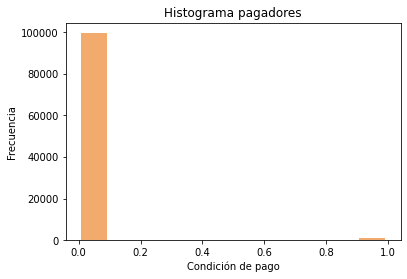

In [46]:
plt.hist(x=df_concat['pagadores'], color='#F2AB6D', rwidth=0.85,)
plt.title('Histograma pagadores')
plt.xlabel('Condición de pago')
plt.ylabel('Frecuencia')


plt.show() 

In [47]:
X = df_concat.drop(columns = ['pagadores'])
y = df_concat["pagadores"]


X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=True, stratify = y, test_size=0.20, random_state=42)

undersample = RandomUnderSampler(sampling_strategy={0: 3000, 1: 1058})

X_train, y_train = undersample.fit_resample(X_train, y_train)




In [48]:
y_test.shape

(20174,)

#Model SVC

In [49]:
model_svc = HalvingGridSearchCV(model_svc, params_svc, random_state = 0, n_jobs=-1, scoring = 'recall').fit(X_train,y_train)

c:\Users\Matias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 3 42 43 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Matias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [50]:
y_pred_svc = model_svc.predict(X_test)

In [51]:
#Comparamos con classification_report
print('Classification report')
print(classification_report(y_test, y_pred_svc))

Classification report
              precision    recall  f1-score   support

           0       0.99      0.68      0.81     19909
           1       0.03      0.68      0.05       265

    accuracy                           0.68     20174
   macro avg       0.51      0.68      0.43     20174
weighted avg       0.98      0.68      0.80     20174



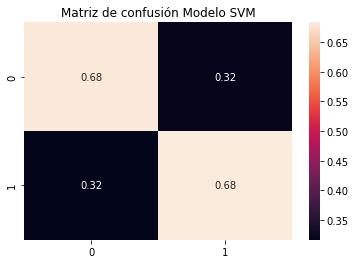

In [52]:
from sklearn import metrics
import seaborn as sns

matriz = metrics.confusion_matrix(y_test, y_pred_svc, normalize='true')

# plt.figure(figsize=(16,9))
sns.heatmap(matriz, annot=True)
plt.title('Matriz de confusión Modelo SVM')
plt.show()

In [53]:
model_svc.best_estimator_

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('Variables Numericas',
                                                  StandardScaler(),
                                                  ['MONTO_CASTIGO_ORIGINAL',
                                                   'COMISION_MORA',
                                                   'INTERES_MORA',
                                                   'IMPUESTO_MORA',
                                                   'CAPITAL_NO_FINANCIADO']),
                                                 ('Variables Categoricas',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['SUCURSAL', 'MARCA_PAGO',
                                                   'MARCA_EMPEX',
                                                   'CONTACTO_TELEFONICO',
                                                   'CONTACTO_TERRENO',
                                                   'COB_JUDICIAL', 'CONVENIO',
                                                   'CONVENIO_ACTIVO',
                                                   'CASTIGO_TRIB'])])),
                ('Selection', SelectPercentile(percentile=20)),
                ('Clasificador', SVC(class_weight='balanced'))])

#Model KNN

In [54]:
model_knn = HalvingGridSearchCV(model_knn, params_knn, random_state = 0, n_jobs=-1, scoring = 'recall').fit(X_train,y_train)

c:\Users\Matias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 3 42 43 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Matias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [55]:
y_pred_knn = model_knn.predict(X_test)

In [56]:
#Comparamos con classification_report
print('Classification report')
print(classification_report(y_test, y_pred_knn))

Classification report
              precision    recall  f1-score   support

           0       0.99      0.81      0.89     19909
           1       0.03      0.42      0.05       265

    accuracy                           0.80     20174
   macro avg       0.51      0.61      0.47     20174
weighted avg       0.98      0.80      0.88     20174



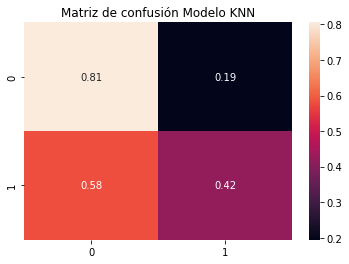

In [57]:
from sklearn import metrics
import seaborn as sns

matriz = metrics.confusion_matrix(y_test, y_pred_knn, normalize='true')

# plt.figure(figsize=(16,9))
sns.heatmap(matriz, annot=True)
plt.title('Matriz de confusión Modelo KNN')
plt.show()

In [58]:
model_knn.best_estimator_

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('Variables Numericas',
                                                  StandardScaler(),
                                                  ['MONTO_CASTIGO_ORIGINAL',
                                                   'COMISION_MORA',
                                                   'INTERES_MORA',
                                                   'IMPUESTO_MORA',
                                                   'CAPITAL_NO_FINANCIADO']),
                                                 ('Variables Categoricas',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['SUCURSAL', 'MARCA_PAGO',
                                                   'MARCA_EMPEX',
                                                   'CONTACTO_TELEFONICO',
                                                   'CONTACTO_TERRENO',
                                                   'COB_JUDICIAL', 'CONVENIO',
                                                   'CONVENIO_ACTIVO',
                                                   'CASTIGO_TRIB'])])),
                ('Selection', SelectPercentile(percentile=90)),
                ('Clasificador',
                 KNeighborsClassifier(n_neighbors=2, weights='distance'))])

#Model Tree

In [59]:
model_tree = HalvingGridSearchCV(model_tree, params_tree, random_state = 0, n_jobs=-1, scoring = 'recall').fit(X_train,y_train)

c:\Users\Matias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 3 42 43 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Matias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [60]:
y_pred_tree = model_tree.predict(X_test)

In [61]:
#Comparamos con classification_report
print('Classification report')
print(classification_report(y_test, y_pred_tree))

Classification report
              precision    recall  f1-score   support

           0       0.99      0.80      0.89     19909
           1       0.03      0.46      0.06       265

    accuracy                           0.80     20174
   macro avg       0.51      0.63      0.47     20174
weighted avg       0.98      0.80      0.87     20174



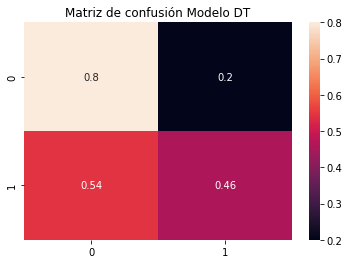

In [62]:
from sklearn import metrics
import seaborn as sns

matriz = metrics.confusion_matrix(y_test, y_pred_tree, normalize='true')

# plt.figure(figsize=(16,9))
sns.heatmap(matriz, annot=True)
plt.title('Matriz de confusión Modelo DT')
plt.show()

In [63]:
model_tree.best_estimator_

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('Variables Numericas',
                                                  StandardScaler(),
                                                  ['MONTO_CASTIGO_ORIGINAL',
                                                   'COMISION_MORA',
                                                   'INTERES_MORA',
                                                   'IMPUESTO_MORA',
                                                   'CAPITAL_NO_FINANCIADO']),
                                                 ('Variables Categoricas',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['SUCURSAL', 'MARCA_PAGO',
                                                   'MARCA_EMPEX',
                                                   'CONTACTO_TELEFONICO',
                                                   'CONTACTO_TERRENO',
                                                   'COB_JUDICIAL', 'CONVENIO',
                                                   'CONVENIO_ACTIVO',
                                                   'CASTIGO_TRIB'])])),
                ('Selection', SelectPercentile(percentile=60)),
                ('Clasificador', DecisionTreeClassifier())])

#Model Random Forest

In [64]:
model_rf = HalvingGridSearchCV(model_rf, params_rf, random_state = 0, n_jobs=-1, scoring = 'recall').fit(X_train,y_train)

c:\Users\Matias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 3 42 43 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Matias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [65]:
y_pred_rf = model_rf.predict(X_test)

In [66]:
#Comparamos con classification_report
print('Classification report')
print(classification_report(y_test, y_pred_rf))

Classification report
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     19909
           1       0.05      0.34      0.08       265

    accuracy                           0.90     20174
   macro avg       0.52      0.62      0.51     20174
weighted avg       0.98      0.90      0.94     20174



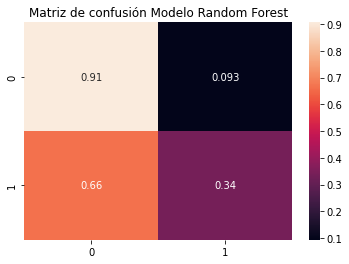

In [67]:
from sklearn import metrics
import seaborn as sns

matriz = metrics.confusion_matrix(y_test, y_pred_rf, normalize='true')

# plt.figure(figsize=(16,9))
sns.heatmap(matriz, annot=True)
plt.title('Matriz de confusión Modelo Random Forest')
plt.show()

In [68]:
model_rf.best_estimator_

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('Variables Numericas',
                                                  StandardScaler(),
                                                  ['MONTO_CASTIGO_ORIGINAL',
                                                   'COMISION_MORA',
                                                   'INTERES_MORA',
                                                   'IMPUESTO_MORA',
                                                   'CAPITAL_NO_FINANCIADO']),
                                                 ('Variables Categoricas',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['SUCURSAL', 'MARCA_PAGO',
                                                   'MARCA_EMPEX',
                                                   'CONTACTO_TELEFONICO',
                                                   'CONTACTO_TERRENO',
                                                   'COB_JUDICIAL', 'CONVENIO',
                                                   'CONVENIO_ACTIVO',
                                                   'CASTIGO_TRIB'])])),
                ('Selection', SelectPercentile(percentile=60)),
                ('Clasificador', RandomForestClassifier())])

#Model Balanced Random Forest

In [69]:
model_balanced_rf = HalvingGridSearchCV(model_balanced_rf, params_balanced_rf, random_state = 0, n_jobs=-1, scoring = 'balanced_accuracy').fit(X_train,y_train)

c:\Users\Matias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 3 42 43 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Matias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [70]:
y_pred_balanced_rf = model_balanced_rf.predict(X_test)

In [71]:
#Comparamos con classification_report
print('Classification report')
print(classification_report(y_test, y_pred_balanced_rf))

Classification report
              precision    recall  f1-score   support

           0       0.99      0.68      0.81     19909
           1       0.03      0.68      0.05       265

    accuracy                           0.68     20174
   macro avg       0.51      0.68      0.43     20174
weighted avg       0.98      0.68      0.80     20174



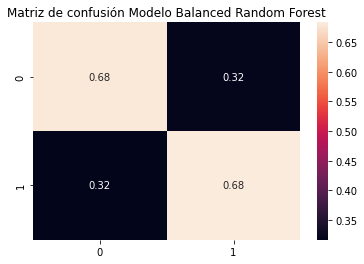

In [72]:
from sklearn import metrics
import seaborn as sns

matriz = metrics.confusion_matrix(y_test, y_pred_balanced_rf, normalize='true')

# plt.figure(figsize=(16,9))
sns.heatmap(matriz, annot=True)
plt.title('Matriz de confusión Modelo Balanced Random Forest')
plt.show()

In [73]:
model_balanced_rf.best_estimator_

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('Variables Numericas',
                                                  StandardScaler(),
                                                  ['MONTO_CASTIGO_ORIGINAL',
                                                   'COMISION_MORA',
                                                   'INTERES_MORA',
                                                   'IMPUESTO_MORA',
                                                   'CAPITAL_NO_FINANCIADO']),
                                                 ('Variables Categoricas',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['SUCURSAL', 'MARCA_PAGO',
                                                   'MARCA_EMPEX',
                                                   'CONTACTO_TELEFONICO',
                                                   'CONTACTO_TERRENO',
                                                   'COB_JUDICIAL', 'CONVENIO',
                                                   'CONVENIO_ACTIVO',
                                                   'CASTIGO_TRIB'])])),
                ('Selection', SelectPercentile(percentile=20)),
                ('Clasificador',
                 BalancedRandomForestClassifier(criterion='entropy'))])

#Ahora veremos las features con mayor importancia para el mejor modelo.

In [74]:
X = pd.get_dummies(X, columns = categoricas)

X[numericas] = scaler.fit_transform(X[numericas])


X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify = y, test_size=0.20, random_state=42)

undersample = RandomUnderSampler(sampling_strategy={0: 3000, 1: 1058})

X_train, y_train = undersample.fit_resample(X_train, y_train)



In [75]:
model_B_RF = BalancedRandomForestClassifier(n_estimators=80,
    criterion='entropy',
    max_depth=30,
    max_features='sqrt',
    n_jobs=-1,
    class_weight='balanced')

model_B_RF.fit(X_train, y_train) 

BalancedRandomForestClassifier(class_weight='balanced', criterion='entropy',
                               max_depth=30, n_estimators=80, n_jobs=-1)

In [76]:
importances = model_B_RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_B_RF.estimators_], axis=0)

In [77]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)


important_features = pd.DataFrame()
important_features['valor importancia'] = forest_importances

important_features['variable'] = X.columns

important_features = important_features.sort_values(ascending = False, by = 'valor importancia')

important_features[:7]

,valor importancia,variable
feature 0,0.245641,MONTO_CASTIGO_ORIGINAL
feature 2,0.166795,INTERES_MORA
feature 4,0.160689,CAPITAL_NO_FINANCIADO
feature 1,0.047991,COMISION_MORA
feature 39,0.031804,MARCA_PAGO_ALTO
feature 50,0.031572,CONVENIO_SI
feature 49,0.028357,CONVENIO_NO


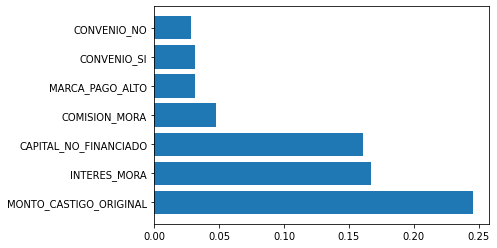

In [78]:
plt.barh(important_features['variable'][:7], important_features['valor importancia'][:7])
plt.show()

#Grafico Decision Tree Classifier


In [79]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=2, random_state=12998)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=12998)

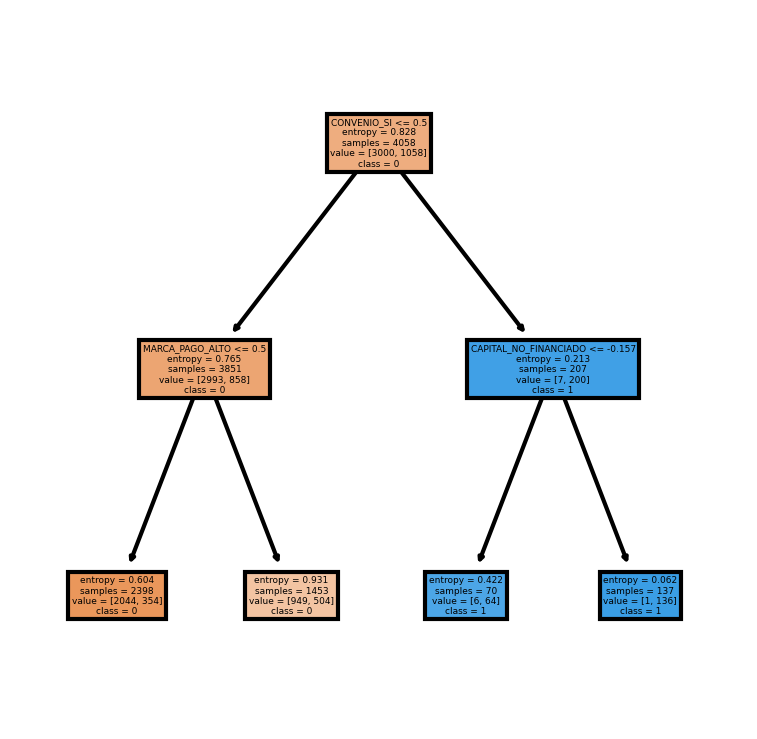

In [80]:

fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)
tree.plot_tree(clf,
               feature_names = X.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

#Red Neuronal


In [81]:
#Creamos el primer modelo de red neuronal feedforward
model = Sequential()
model.add(Dense(300, input_dim=54))
model.add(Dense(300, activation='relu')) #Usamos funcion de activacion relu porque es la mas usada en redes neuronales en las capas ocultas
model.add(Dense(200, activation='relu')) 
model.add(Dense(100, activation='relu')) 
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#La ultima capa segun lo visto en clase corresponde a sigmoid ya que es una clasificacion binaria y segun lo visto en clases es la funcion de activacion que se utiliza para este tipo de problemas.

In [82]:
#Ademas notamos que para este tipo de problemas de clasificacion binaria se utiliza la funcion de perdida binary_crossentropy, por lo cual nuestro modelo contempla esta funcion.
opt = SGD(learning_rate=0.01)
model.compile(loss= 'binary_crossentropy', optimizer=opt, metrics=['accuracy']) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               16500     
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 200)               60200     
                                                                 
 dense_3 (Dense)             (None, 100)               20100     
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 20)                1020      
                                                                 
 dense_6 (Dense)             (None, 1)                 2

In [83]:
max_epochs = 100
history = model.fit(X_train, y_train, epochs=max_epochs, validation_data=(X_test, y_test), batch_size=100)

Epoch 1/100
41/41 [==============================] - 3s 28ms/step - loss: 0.6402 - accuracy: 0.6804 - val_loss: 0.4582 - val_accuracy: 0.9869
Epoch 2/100
41/41 [==============================] - 1s 19ms/step - loss: 0.5754 - accuracy: 0.7393 - val_loss: 0.3572 - val_accuracy: 0.9869
Epoch 3/100
41/41 [==============================] - 1s 19ms/step - loss: 0.5587 - accuracy: 0.7393 - val_loss: 0.3172 - val_accuracy: 0.9869
Epoch 4/100
41/41 [==============================] - 1s 20ms/step - loss: 0.5499 - accuracy: 0.7393 - val_loss: 0.2989 - val_accuracy: 0.9869
Epoch 5/100
41/41 [==============================] - 1s 19ms/step - loss: 0.5417 - accuracy: 0.7393 - val_loss: 0.2955 - val_accuracy: 0.9869
Epoch 6/100
41/41 [==============================] - 1s 20ms/step - loss: 0.5336 - accuracy: 0.7393 - val_loss: 0.2875 - val_accuracy: 0.9869
Epoch 7/100
41/41 [==============================] - 1s 19ms/step - loss: 0.5256 - accuracy: 0.7393 - val_loss: 0.2739 - val_accuracy: 0.9869
Epoch 

In [84]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

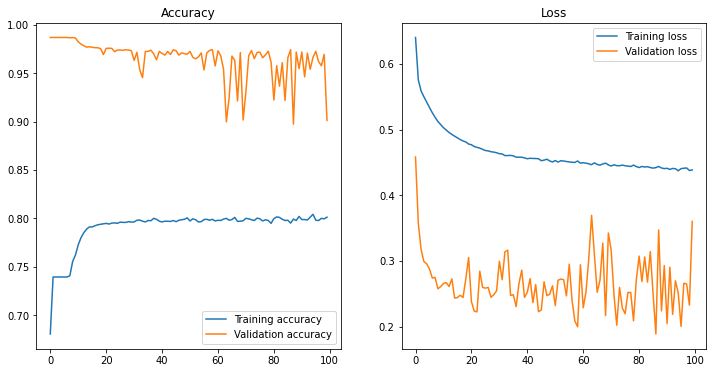

In [85]:
#Ahora graficaremos la funcion de perdida y la funcion de accuracy para ver como evolucionan en el tiempo
figura, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

n_epochs = len(acc)

ax1.plot(range(n_epochs), acc, label='Training accuracy')
ax1.plot(range(n_epochs), val_acc, label='Validation accuracy')
ax1.set_title('Accuracy')
ax1.legend()

ax2.plot(range(n_epochs), loss, label='Training loss')
ax2.plot(range(n_epochs), val_loss, label='Validation loss')
ax2.set_title('Loss')
ax2.legend()

In [86]:
X_train

,MONTO_CASTIGO_ORIGINAL,COMISION_MORA,INTERES_MORA,IMPUESTO_MORA,CAPITAL_NO_FINANCIADO,SUCURSAL_ANTOFAGASTA,SUCURSAL_ARICA,SUCURSAL_CALAMA,SUCURSAL_CHILLAN,SUCURSAL_CONCEPCION,...,MARCA_EMPEX_MEDIO,CONTACTO_TELEFONICO_NO,CONTACTO_TERRENO_NO,COB_JUDICIAL_NO,COB_JUDICIAL_SI,CONVENIO_NO,CONVENIO_SI,CONVENIO_ACTIVO_NO,CONVENIO_ACTIVO_SI,CASTIGO_TRIB_NO
0,1.995978,-0.235921,0.707559,0.0,2.394892,0,0,0,0,0,...,1,1,1,1,0,1,0,1,0,1
1,-0.613064,0.315825,-0.003286,0.0,-0.471199,0,0,0,0,0,...,0,1,1,1,0,1,0,1,0,1
2,-0.636346,-0.235921,-0.104906,0.0,-0.491692,0,0,0,0,0,...,0,1,1,1,0,1,0,1,0,1
3,-0.637545,-0.235921,-0.514954,0.0,-0.478398,0,0,0,0,0,...,1,1,1,1,0,1,0,1,0,1
4,-0.706696,-0.235921,-0.088924,0.0,-0.570180,0,0,0,0,0,...,1,1,1,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053,0.255847,-0.235921,1.899031,0.0,0.425042,0,0,0,0,0,...,0,1,1,1,0,0,1,0,1,1
4054,0.167009,-0.235921,0.339927,0.0,0.382240,0,0,0,0,0,...,1,1,1,1,0,1,0,1,0,1
4055,0.175766,-0.235921,0.973342,0.0,0.369353,0,0,0,0,0,...,0,1,1,1,0,1,0,0,1,1
4056,-0.617569,-0.235921,-1.013231,0.0,-0.799108,0,0,0,0,0,...,0,1,1,1,0,1,0,1,0,1


In [87]:
model_B_RF = BalancedRandomForestClassifier(n_estimators=50,
    criterion='gini',
    max_depth=30,
    max_features='sqrt',
    n_jobs=-1,
    class_weight='balanced')

model_B_RF.fit(X_train, y_train) 

BalancedRandomForestClassifier(class_weight='balanced', max_depth=30,
                               n_estimators=50, n_jobs=-1)

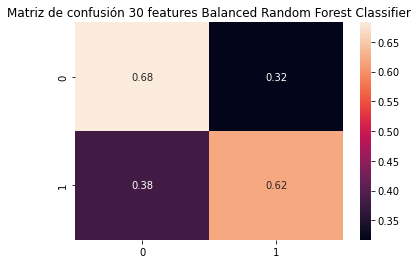

In [88]:
from sklearn import metrics
import seaborn as sns
y_predict = model_B_RF.predict(X_test)
matriz = metrics.confusion_matrix(y_test, y_predict, normalize='true')


sns.heatmap(matriz, annot=True)
plt.title('Matriz de confusión 30 features Balanced Random Forest Classifier')
plt.show()

In [89]:
model_balanced_rf.best_estimator_

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('Variables Numericas',
                                                  StandardScaler(),
                                                  ['MONTO_CASTIGO_ORIGINAL',
                                                   'COMISION_MORA',
                                                   'INTERES_MORA',
                                                   'IMPUESTO_MORA',
                                                   'CAPITAL_NO_FINANCIADO']),
                                                 ('Variables Categoricas',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['SUCURSAL', 'MARCA_PAGO',
                                                   'MARCA_EMPEX',
                                                   'CONTACTO_TELEFONICO',
                                                   'CONTACTO_TERRENO',
                                                   'COB_JUDICIAL', 'CONVENIO',
                                                   'CONVENIO_ACTIVO',
                                                   'CASTIGO_TRIB'])])),
                ('Selection', SelectPercentile(percentile=20)),
                ('Clasificador',
                 BalancedRandomForestClassifier(criterion='entropy'))])

#Ahora probaremos balanceando los datos con SMOTE


In [90]:
X = df_concat.drop(columns = ['pagadores'])
y = df_concat["pagadores"]
X = pd.get_dummies(X, columns = categoricas)


X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=True, stratify = y, test_size=0.20, random_state=42)

from imblearn.over_sampling import SMOTE

undersample = RandomUnderSampler(sampling_strategy={0: 5000, 1: 1058})
X_train, y_train = undersample.fit_resample(X_train, y_train)

sm= SMOTE(sampling_strategy = {0: 5000 , 1: 3000})
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
X_train, y_train = X_train_smote, y_train_smote


preprocessor1 = ColumnTransformer(transformers = [('Variables Numericas', scaler, numericas),])

model_svc = Pipeline(steps=[('Preprocessing', preprocessor1),
                            ("Selection", SelectPercentile(f_classif, percentile=90)),
                            ('Clasificador', SVC())])

model_tree = Pipeline(steps=[('Preprocessing', preprocessor1),
                             ("Selection", SelectPercentile(f_classif, percentile=90)),
                             ('Clasificador',DecisionTreeClassifier())])

model_rf = Pipeline(steps=[('Preprocessing', preprocessor1),
                           ("Selection", SelectPercentile(f_classif, percentile=90)),
                           ('Clasificador', RandomForestClassifier())])


model_balanced_rf = Pipeline(steps=[('Preprocessing', preprocessor1),
                           ("Selection", SelectPercentile(f_classif, percentile=90)),
                           ('Clasificador', BalancedRandomForestClassifier())])

model_knn = Pipeline(steps=[
                           ('Preprocessing', preprocessor1),
                           ("Selection", SelectPercentile(f_classif, percentile=90)),
                           ('Clasificador', KNeighborsClassifier())
])

#Model SVC

In [91]:
model_svc = HalvingGridSearchCV(model_svc, params_svc, random_state = 0, n_jobs=-1, scoring = 'recall').fit(X_train,y_train)

c:\Users\Matias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Matias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [92]:
y_pred_svc = model_svc.predict(X_test)

In [93]:
#Comparamos con classification_report
print('Classification report')
print(classification_report(y_test, y_pred_svc))

Classification report
              precision    recall  f1-score   support

           0       0.99      0.28      0.43     19909
           1       0.01      0.80      0.03       265

    accuracy                           0.28     20174
   macro avg       0.50      0.54      0.23     20174
weighted avg       0.98      0.28      0.43     20174



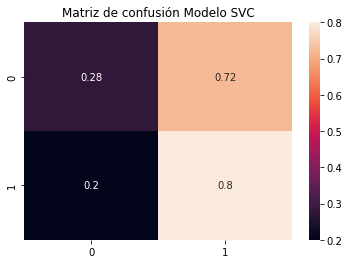

In [94]:
from sklearn import metrics
import seaborn as sns

matriz = metrics.confusion_matrix(y_test, y_pred_svc, normalize='true')

# plt.figure(figsize=(16,9))
sns.heatmap(matriz, annot=True)
plt.title('Matriz de confusión Modelo SVC')
plt.show()

In [95]:
model_svc.best_estimator_

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('Variables Numericas',
                                                  StandardScaler(),
                                                  ['MONTO_CASTIGO_ORIGINAL',
                                                   'COMISION_MORA',
                                                   'INTERES_MORA',
                                                   'IMPUESTO_MORA',
                                                   'CAPITAL_NO_FINANCIADO'])])),
                ('Selection', SelectPercentile(percentile=60)),
                ('Clasificador', SVC(class_weight='balanced'))])

#Model KNN

In [96]:
model_knn = HalvingGridSearchCV(model_knn, params_knn, random_state = 0, n_jobs=-1, scoring = 'recall').fit(X_train,y_train)

c:\Users\Matias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Matias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [97]:
y_pred_knn = model_knn.predict(X_test)

In [98]:
#Comparamos con classification_report
print('Classification report')
print(classification_report(y_test, y_pred_knn))

Classification report
              precision    recall  f1-score   support

           0       0.99      0.75      0.86     19909
           1       0.02      0.38      0.04       265

    accuracy                           0.75     20174
   macro avg       0.50      0.57      0.45     20174
weighted avg       0.98      0.75      0.85     20174



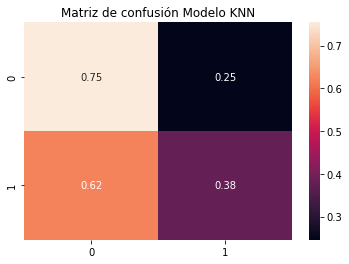

In [99]:
from sklearn import metrics
import seaborn as sns

matriz = metrics.confusion_matrix(y_test, y_pred_knn, normalize='true')

# plt.figure(figsize=(16,9))
sns.heatmap(matriz, annot=True)
plt.title('Matriz de confusión Modelo KNN')
plt.show()

In [100]:
model_knn.best_estimator_

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('Variables Numericas',
                                                  StandardScaler(),
                                                  ['MONTO_CASTIGO_ORIGINAL',
                                                   'COMISION_MORA',
                                                   'INTERES_MORA',
                                                   'IMPUESTO_MORA',
                                                   'CAPITAL_NO_FINANCIADO'])])),
                ('Selection', SelectPercentile(percentile=60)),
                ('Clasificador',
                 KNeighborsClassifier(n_neighbors=4, weights='distance'))])

#Model Tree

In [101]:
model_tree = HalvingGridSearchCV(model_tree, params_tree, random_state = 0, n_jobs=-1, scoring = 'recall').fit(X_train,y_train)

c:\Users\Matias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Matias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [102]:
y_pred_tree = model_tree.predict(X_test)

In [103]:
#Comparamos con classification_report
print('Classification report')
print(classification_report(y_test, y_pred_tree))

Classification report
              precision    recall  f1-score   support

           0       0.99      0.76      0.86     19909
           1       0.02      0.36      0.04       265

    accuracy                           0.75     20174
   macro avg       0.50      0.56      0.45     20174
weighted avg       0.98      0.75      0.85     20174



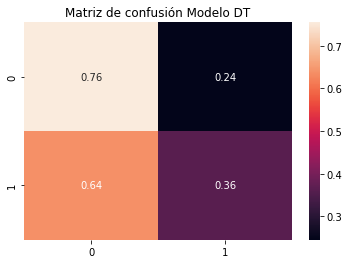

In [104]:
from sklearn import metrics
import seaborn as sns

matriz = metrics.confusion_matrix(y_test, y_pred_tree, normalize='true')

# plt.figure(figsize=(16,9))
sns.heatmap(matriz, annot=True)
plt.title('Matriz de confusión Modelo DT')
plt.show()

In [105]:
model_tree.best_estimator_

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('Variables Numericas',
                                                  StandardScaler(),
                                                  ['MONTO_CASTIGO_ORIGINAL',
                                                   'COMISION_MORA',
                                                   'INTERES_MORA',
                                                   'IMPUESTO_MORA',
                                                   'CAPITAL_NO_FINANCIADO'])])),
                ('Selection', SelectPercentile(percentile=80)),
                ('Clasificador', DecisionTreeClassifier(criterion='entropy'))])

#Model Random Forest

In [106]:
model_rf = HalvingGridSearchCV(model_rf, params_rf, random_state = 0, n_jobs=-1, scoring = 'recall').fit(X_train,y_train)

c:\Users\Matias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Matias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [107]:
y_pred_rf = model_rf.predict(X_test)

In [108]:
#Comparamos con classification_report
print('Classification report')
print(classification_report(y_test, y_pred_rf))

Classification report
              precision    recall  f1-score   support

           0       0.99      0.81      0.89     19909
           1       0.02      0.34      0.04       265

    accuracy                           0.81     20174
   macro avg       0.51      0.58      0.47     20174
weighted avg       0.98      0.81      0.88     20174



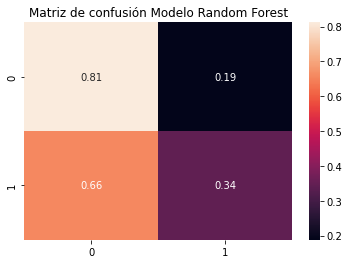

In [109]:
from sklearn import metrics
import seaborn as sns

matriz = metrics.confusion_matrix(y_test, y_pred_rf, normalize='true')

# plt.figure(figsize=(16,9))
sns.heatmap(matriz, annot=True)
plt.title('Matriz de confusión Modelo Random Forest')
plt.show()

In [110]:
model_rf.best_estimator_

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('Variables Numericas',
                                                  StandardScaler(),
                                                  ['MONTO_CASTIGO_ORIGINAL',
                                                   'COMISION_MORA',
                                                   'INTERES_MORA',
                                                   'IMPUESTO_MORA',
                                                   'CAPITAL_NO_FINANCIADO'])])),
                ('Selection', SelectPercentile(percentile=80)),
                ('Clasificador', RandomForestClassifier(n_estimators=80))])

#Model Balanced Random Forest

In [111]:
model_balanced_rf = HalvingGridSearchCV(model_balanced_rf, params_balanced_rf, random_state = 0, n_jobs=-1, scoring = 'recall').fit(X_train,y_train)

c:\Users\Matias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Matias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [112]:
y_pred_balanced_rf = model_balanced_rf.predict(X_test)

In [113]:
#Comparamos con classification_report
print('Classification report')
print(classification_report(y_test, y_pred_balanced_rf))

Classification report
              precision    recall  f1-score   support

           0       0.99      0.70      0.82     19909
           1       0.02      0.43      0.04       265

    accuracy                           0.69     20174
   macro avg       0.50      0.57      0.43     20174
weighted avg       0.98      0.69      0.81     20174



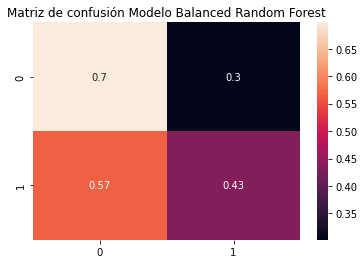

In [114]:
from sklearn import metrics
import seaborn as sns

matriz = metrics.confusion_matrix(y_test, y_pred_balanced_rf, normalize='true')

# plt.figure(figsize=(16,9))
sns.heatmap(matriz, annot=True)
plt.title('Matriz de confusión Modelo Balanced Random Forest')
plt.show()